<p>The half-time, It is a show.And in this notebook, we're going to find out how some of the elements of this show interact with each other. After exploring and cleaning our data a little, we're going to answer questions like:</p>

<li>What are the most extreme game outcomes?</li>
<li>How does the game affect television viewership?</li>
<li>How have viewership, TV ratings, and ad cost evolved over time?</li>
<li>Who are the most prolific musicians in terms of halftime show performances?</li>
<p><h3>Datasets</h3></p>
The datasets we'll use are made up of three CSV files, one with game data, one with TV data, and one with halftime musician data for all 52 Super Bowls through 2018.

In [13]:
# Import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:


# Load the CSV data into DataFrames
super_bowl=pd.read_csv('E:\work\Analyzing TV Data\datasets\\super_bowls.csv')
tv=pd.read_csv('E:\work\Analyzing TV Data\datasets\\tv.csv')
musicians=pd.read_csv('E:\work\Analyzing TV Data\datasets\\halftime_musicians.csv')

#the first four rows of each DataFrame
display(super_bowl.head(4))
display(tv.head(4))
display(musicians.sample(4))

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000


,super_bowl,musician,num_songs
3,50,Coldplay,6.0
106,13,Ken Hamilton,NaN
75,28,Clint Black,2.0
65,32,Queen Latifah,2.0


In [11]:
# Summary of the TV data to inspect
super_bowl.info()
print('\n')
tv.info()
print('\n')
musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            52 non-null     object
 1   super_bowl      52 non-null     int64 
 2   venue           52 non-null     object
 3   city            52 non-null     object
 4   state           52 non-null     object
 5   attendance      52 non-null     int64 
 6   team_winner     52 non-null     object
 7   winning_pts     52 non-null     int64 
 8   qb_winner_1     52 non-null     object
 9   qb_winner_2     2 non-null      object
 10  coach_winner    52 non-null     object
 11  team_loser      52 non-null     object
 12  losing_pts      52 non-null     int64 
 13  qb_loser_1      52 non-null     object
 14  qb_loser_2      3 non-null      object
 15  coach_loser     52 non-null     object
 16  combined_pts    52 non-null     int64 
 17  difference_pts  52 non-null     int64 
dtypes: int64(6),

So,as we seen columns  <b>'qb_winner_2'</b> , <b>'qb_loser_2'</b>  in Super_bowl dataframe have miss values. Columns <b>'total_us_viewers'</b> ,  <b>'rating_18_49'</b> and <b>'share_18_49'</b> in tv dataframe and 'num_songs' column in musicians dataframee as well.

 <h3>Combined points distribution</h3>


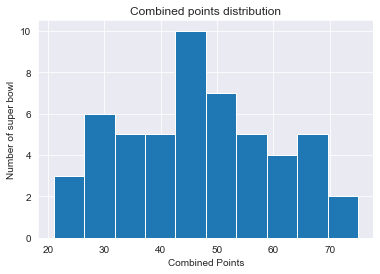

In [19]:
# Plot a histogram of combined points
sns.set_style('darkgrid')
fig,ax=plt.subplots()
ax.hist(super_bowl['combined_pts'])
ax.set_xlabel('Combined Points')
ax.set_ylabel('Number of super bowl')
ax.set_title('Combined points distribution')
plt.show()

<h3>Super Bowls with the highest and lowest combined scores</h3>

In [22]:
print(super_bowl['combined_pts'].max())
print(super_bowl['combined_pts'].min())

75
21


In [37]:
display(super_bowl[super_bowl['combined_pts']>70])
display(super_bowl[super_bowl['combined_pts']<25])

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


<h3>Point difference distribution</h3>

Text(0.5, 1.0, 'Point difference distribution')

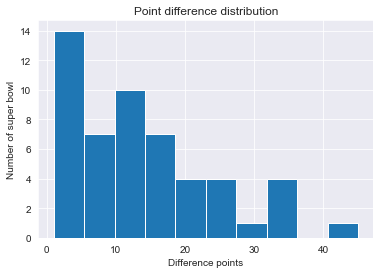

In [30]:
# Plot a histogram of point differences
fig,ax=plt.subplots()
ax.hist(super_bowl['difference_pts'])
ax.set_xlabel('Difference points')
ax.set_ylabel('Number of super bowl')
ax.set_title('Point difference distribution')

<h3>closest game(s) and biggest blowouts</h3>

In [34]:
print(super_bowl['difference_pts'].max())
print(super_bowl['difference_pts'].min())

45
1


In [36]:
display(super_bowl[super_bowl['difference_pts']==1])
display(super_bowl[super_bowl['difference_pts']==45])

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45


<h3>Do blowouts translate to lost viewers?</h3>

In [38]:
# Join game and TV data
game_tv=super_bowl.merge(tv,on='super_bowl')
display(game_tv.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,...,combined_pts,difference_pts,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,...,74,8,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,...,62,6,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,...,34,14,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,...,52,4,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,...,51,35,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


Text(0.5, 1.0, 'Point difference distribution')

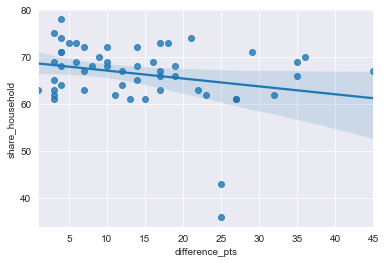

In [40]:
#scatter plot with a linear regression model fit
g=sns.regplot(x='difference_pts',y='share_household',data=game_tv)

The downward sloping regression line and the 95% confidence interval for that regression suggest that bailing on the game if it is a blowout is common

<h3>Viewership and the ad industry over time</h3>
<p>And how have number of viewers and household ratings trended alongside ad cost?</p>
<p>three line plots using the tv DataFrame to compare viewers, rating, and ad cost.</p>

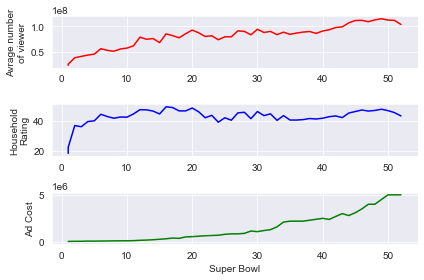

In [66]:
fig,ax=plt.subplots(3,1)
ax[0].plot(tv['super_bowl'],tv['avg_us_viewers'],color='r')
ax[1].plot(tv['super_bowl'],tv['rating_household'],color='b')
ax[2].plot(tv['super_bowl'],tv['ad_cost'],color='g')
ax[0].set_ylabel('Avrage number'+'\n'+ 'of viewer')
ax[1].set_ylabel('Household'+ '\n'+ 'Rating')
ax[2].set_ylabel('Ad Cost')
ax[2].set_xlabel('Super Bowl')
plt.tight_layout()

We can see viewers increased before ad costs did.

<h3>Halftime shows weren't always this great</h3>
<p>Maybe the networks weren't very data savvy and were slow to react?</p>
<p>maybe halftime shows weren't that good in the earlier years? </p>

In [72]:
# Display all halftime musicians for Super Bowls up to and including Super Bowl 27
musicians[musicians['super_bowl']<=27]

,super_bowl,musician,num_songs
80,27,Michael Jackson,5.0
81,26,Gloria Estefan,2.0
82,26,University of Minnesota Marching Band,NaN
83,25,New Kids on the Block,2.0
84,24,Pete Fountain,1.0
85,24,Doug Kershaw,1.0
86,24,Irma Thomas,1.0
87,24,Pride of Nicholls Marching Band,NaN
88,24,The Human Jukebox,NaN
89,24,Pride of Acadiana,NaN


<h3>Who has the most halftime show appearances?</h3>

In [86]:
# Count halftime show appearances for each musician and sort them from most to least
appearances=musicians.groupby('musician')['super_bowl'].count().reset_index()
appearances.sort_values(by='super_bowl',ascending=False)

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
...,...,...
37,Katy Perry,1
35,Judy Mallett,1
34,Jessica Simpson,1
33,Janet Jackson,1


<h3>musicians with more than one halftime show</h3>

In [89]:
# Display musicians with more than one halftime show appearance
appearances[appearances['super_bowl']>1]

,musician,super_bowl
1,Al Hirt,4
5,Beyoncé,2
10,Bruno Mars,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
28,Grambling State University Tiger Marching Band,6
36,Justin Timberlake,2
44,Los Angeles Unified School District All City H...,2
57,Nelly,2
64,Pete Fountain,2


<h3>Who performed the most songs in a halftime show?</h3>

From our previous inspections, the num_songs column has lots of missing values:

A lot of the marching bands don't have num_songs entries.
For non-marching bands, missing data starts occurring the word "Spirit" (a common naming convention for marching bands is "Spirit of [something]")


In [101]:
# Filter out most marching  and spirit words
not_marching=musicians[~musicians['musician'].str.contains('Marching')]
not_marching_spirit=not_marching[~not_marching['musician'].str.contains('Spirit')]
not_marching_spirit

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0
5,50,Bruno Mars,3.0
...,...,...,...
125,4,Marguerite Piazza,NaN
126,4,Doc Severinsen,NaN
127,4,Al Hirt,NaN
128,4,The Human Jukebox,NaN


Text(0, 0.5, 'count of musician')

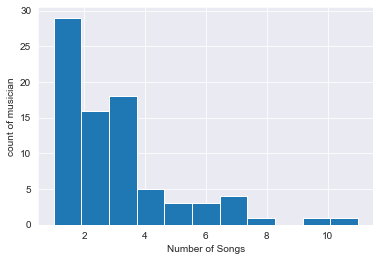

In [121]:
# Plot a histogram of number of songs per performance
k=not_marching_spirit['num_songs'].max()
fig,ax=plt.subplots()
ax.hist(not_marching_spirit['num_songs'].dropna(),bins=int(k))
ax.set_xlabel('Number of Songs')
ax.set_ylabel('count of musician')